In [53]:
import pandas as pd
from jiwer import wer

In [70]:
whisper_en = pd.read_csv('/Users/dongimlee/Library/CloudStorage/OneDrive-OlinCollegeofEngineering/PInT/stuttered-speech-asr/FineTune/dataWhisper.csv')
whisper_en['Filename'] = whisper_en['Filename'].str.replace('.flac', '', regex=False)

en_gt = pd.read_csv('/Users/dongimlee/Library/CloudStorage/OneDrive-OlinCollegeofEngineering/PInT/stuttered-speech-asr/5000Something.csv')
en_gt = en_gt.rename(columns={"FileName": 'Filename'})

merged_df = pd.merge(en_gt, whisper_en, on='Filename')

ground_truth_list = merged_df['Text'].tolist()
prediction_list = merged_df['TunedTranscription'].tolist()
wer_results = [wer(gt, pred) for gt, pred in zip(ground_truth_list, prediction_list)]

merged_df['wer'] = wer_results
merged_df = merged_df.rename(columns={'Filename': 'filename', 'TunedTranscription': 'tuned_transcription', 'Text': 'ground_truth', 'StutterType': 'stutter_type'})



In [71]:
merged_df['wer'].mean()

0.00897510015109316

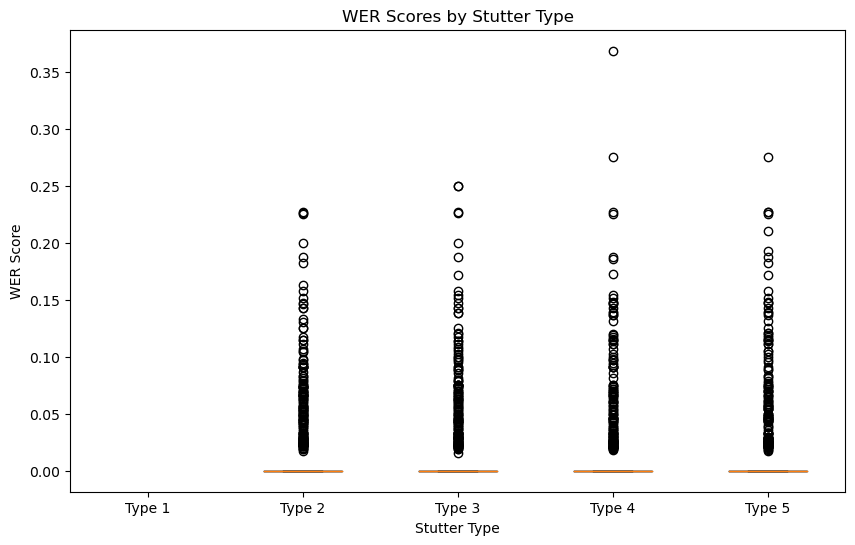

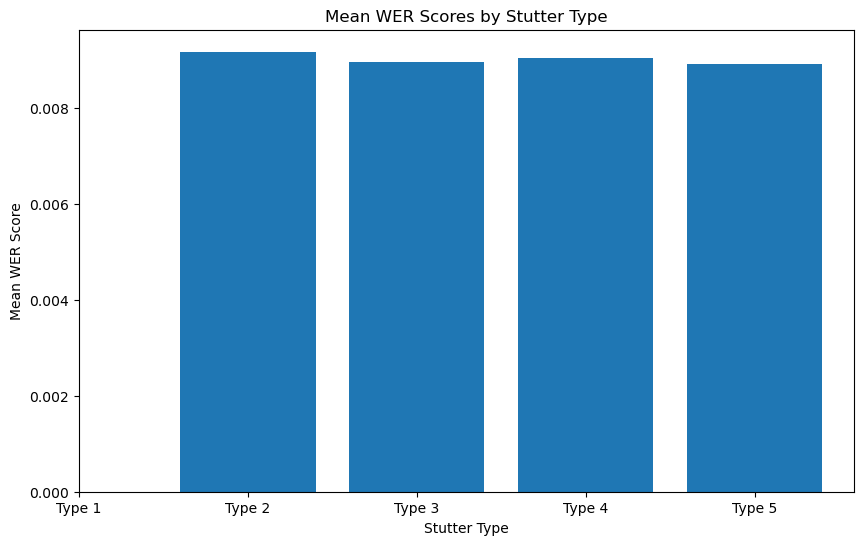

In [72]:
import numpy as np
import matplotlib.pyplot as plt

merged_df['stutter_type'] = merged_df['stutter_type'].str.strip('[]').str.split().apply(lambda x: list(map(int, x)))

stutter_types = [1, 2, 3, 4, 5]
stutter_data = {}

for st_type in stutter_types:
    stutter_data[st_type] = merged_df[merged_df['stutter_type'].apply(lambda x: st_type in x)]

# Combine results for plotting
stutter_summary = {st_type: data['wer'] for st_type, data in stutter_data.items()}

# Convert to a dataframe for better analysis
stutter_summary_df = pd.DataFrame.from_dict(stutter_summary, orient='index').transpose()

# Boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(stutter_summary.values(), labels=[f"Type {st}" for st in stutter_types])
plt.title("WER Scores by Stutter Type")
plt.ylabel("WER Score")
plt.xlabel("Stutter Type")
plt.show()

# Mean WER scores for bar graph
mean_wer = {st_type: data['wer'].mean() for st_type, data in stutter_data.items()}

# Bar graph
plt.figure(figsize=(10, 6))
plt.bar(mean_wer.keys(), mean_wer.values(), tick_label=[f"Type {st}" for st in stutter_types])
plt.title("Mean WER Scores by Stutter Type")
plt.ylabel("Mean WER Score")
plt.xlabel("Stutter Type")
plt.show()
